In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
data = pd.read_csv('data/cleaned_20330202.csv')
data = data.drop(columns=['Unnamed: 0'])

# General Stats

In [25]:
data.describe(percentiles=[]).to_csv("tables/num_description.csv")
data.describe(percentiles=[], include = 'object').to_csv("tables/cat_description.csv")

In [26]:
data.shape

(22, 79)

In [27]:
data.columns

Index(['area-type', 'house-type', 'house-size', 'postcode', 'household-size',
       'image', 'image-description', 'frequency-usage-office',
       'frequency-usage-living-dining', 'frequency-usage-bedrooms',
       'frequency-usage-kitchen', 'frequency-usage-outdoors',
       'frequency-usage-berging', 'living-dining-hot', 'living-dining-cold',
       'living-dining-humid', 'living-dining-fresh', 'living-dining-noisy',
       'living-dining-poorly-lit', 'living-dining-well-lit',
       'living-dining-wifi', 'living-dining-often-used', 'office-hot',
       'office-cold', 'office-humid', 'office-fresh', 'office-noisy',
       'office-poorly-lit', 'office-well-lit', 'office-wifi',
       'office-often-used', 'bedroom-hot', 'bedroom-cold', 'bedroom-humid',
       'bedroom-fresh', 'bedroom-noisy', 'bedroom-poorly-lit',
       'bedroom-well-lit', 'bedroom-wifi', 'bedroom-often-used', 'kitchen-hot',
       'kitchen-cold', 'kitchen-humid', 'kitchen-fresh', 'kitchen-noisy',
       'kitchen-poo

# Demographics

In [28]:
data.groupby(['area-type', 'house-type', 'house-size', 'household-size'])['area-type'].count()

area-type    house-type     house-size        household-size
City         Apartment      100 - 150 m²      4                 1
                            50 - 75 m²        2                 1
                            75 - 100 m²       2                 1
                                              3                 2
                                              5                 1
             Terraced       100 - 150 m²      3                 1
                                              5                 2
                            150 - 200 m²      4                 1
                            50 - 75 m²        3                 1
                            75 - 100 m²       4                 3
                            more than 200 m²  4                 1
Countryside  Apartment      75 - 100 m²       3                 1
Suburbs      Terraced       75 - 100 m²       5                 1
Village      Detached       150 - 200 m²      3                 1
               

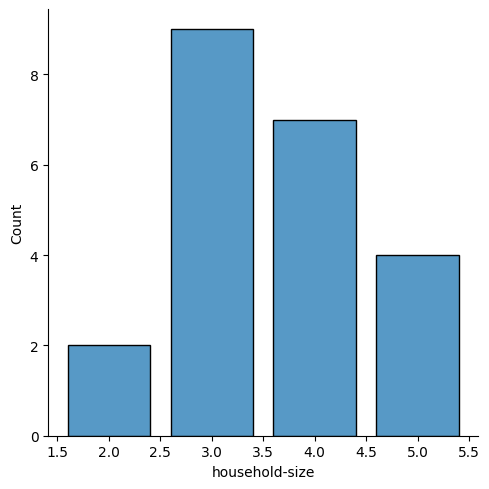

In [29]:
sns.displot(data, x='household-size', binwidth=0.5, discrete=True, shrink=.8)
plt.savefig('plots/household-size-bar.jpg', dpi=300, bbox_inches=None)

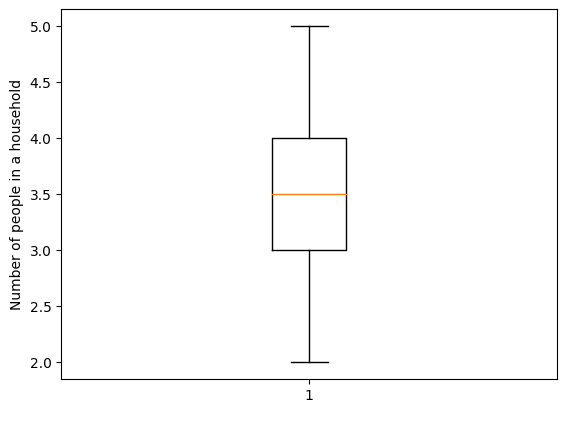

In [30]:
fig, ax = plt.subplots()
ax.boxplot(data['household-size'])
plt.ylabel("Number of people in a household")
plt.xlabel(" ")
plt.savefig('plots/household-size-boxplot.jpg', dpi=300, bbox_inches=None)

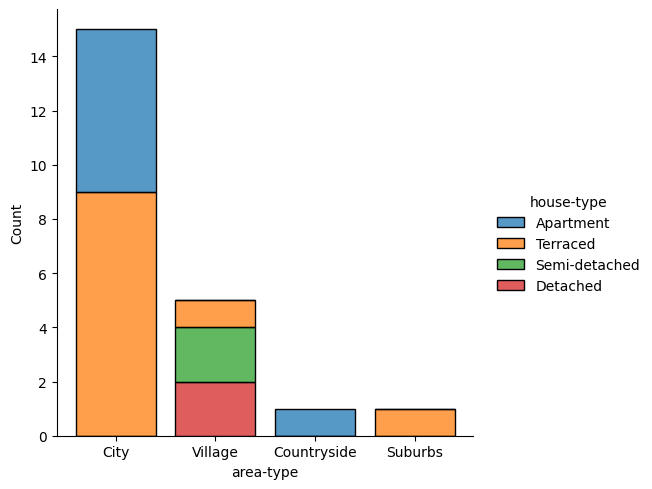

In [31]:
sns.displot(data, x='area-type', hue='house-type', discrete=True, shrink=.8, multiple="stack")
plt.savefig('plots/demographics-overview.jpg', dpi=300, bbox_inches=None)

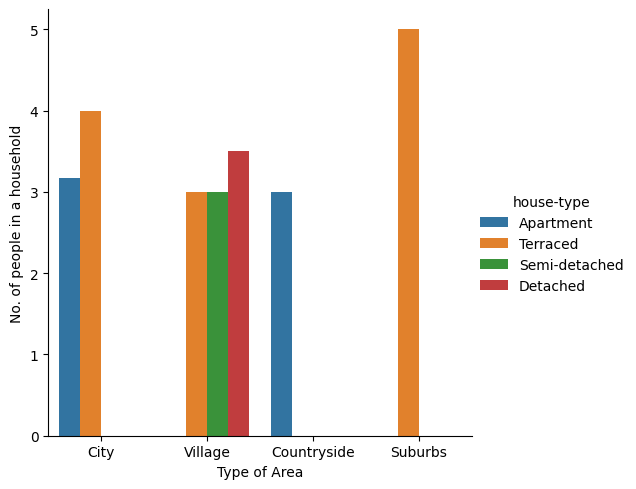

In [32]:
sns.catplot(data, x="area-type", y="household-size", hue="house-type", kind="bar", errorbar=None)
plt.ylabel("No. of people in a household", size=10)
plt.xlabel("Type of Area", size=10)
plt.savefig('plots/demographics-overview-alt.jpg', dpi=300, bbox_inches=None)

# Bonus Question: Image Analysis

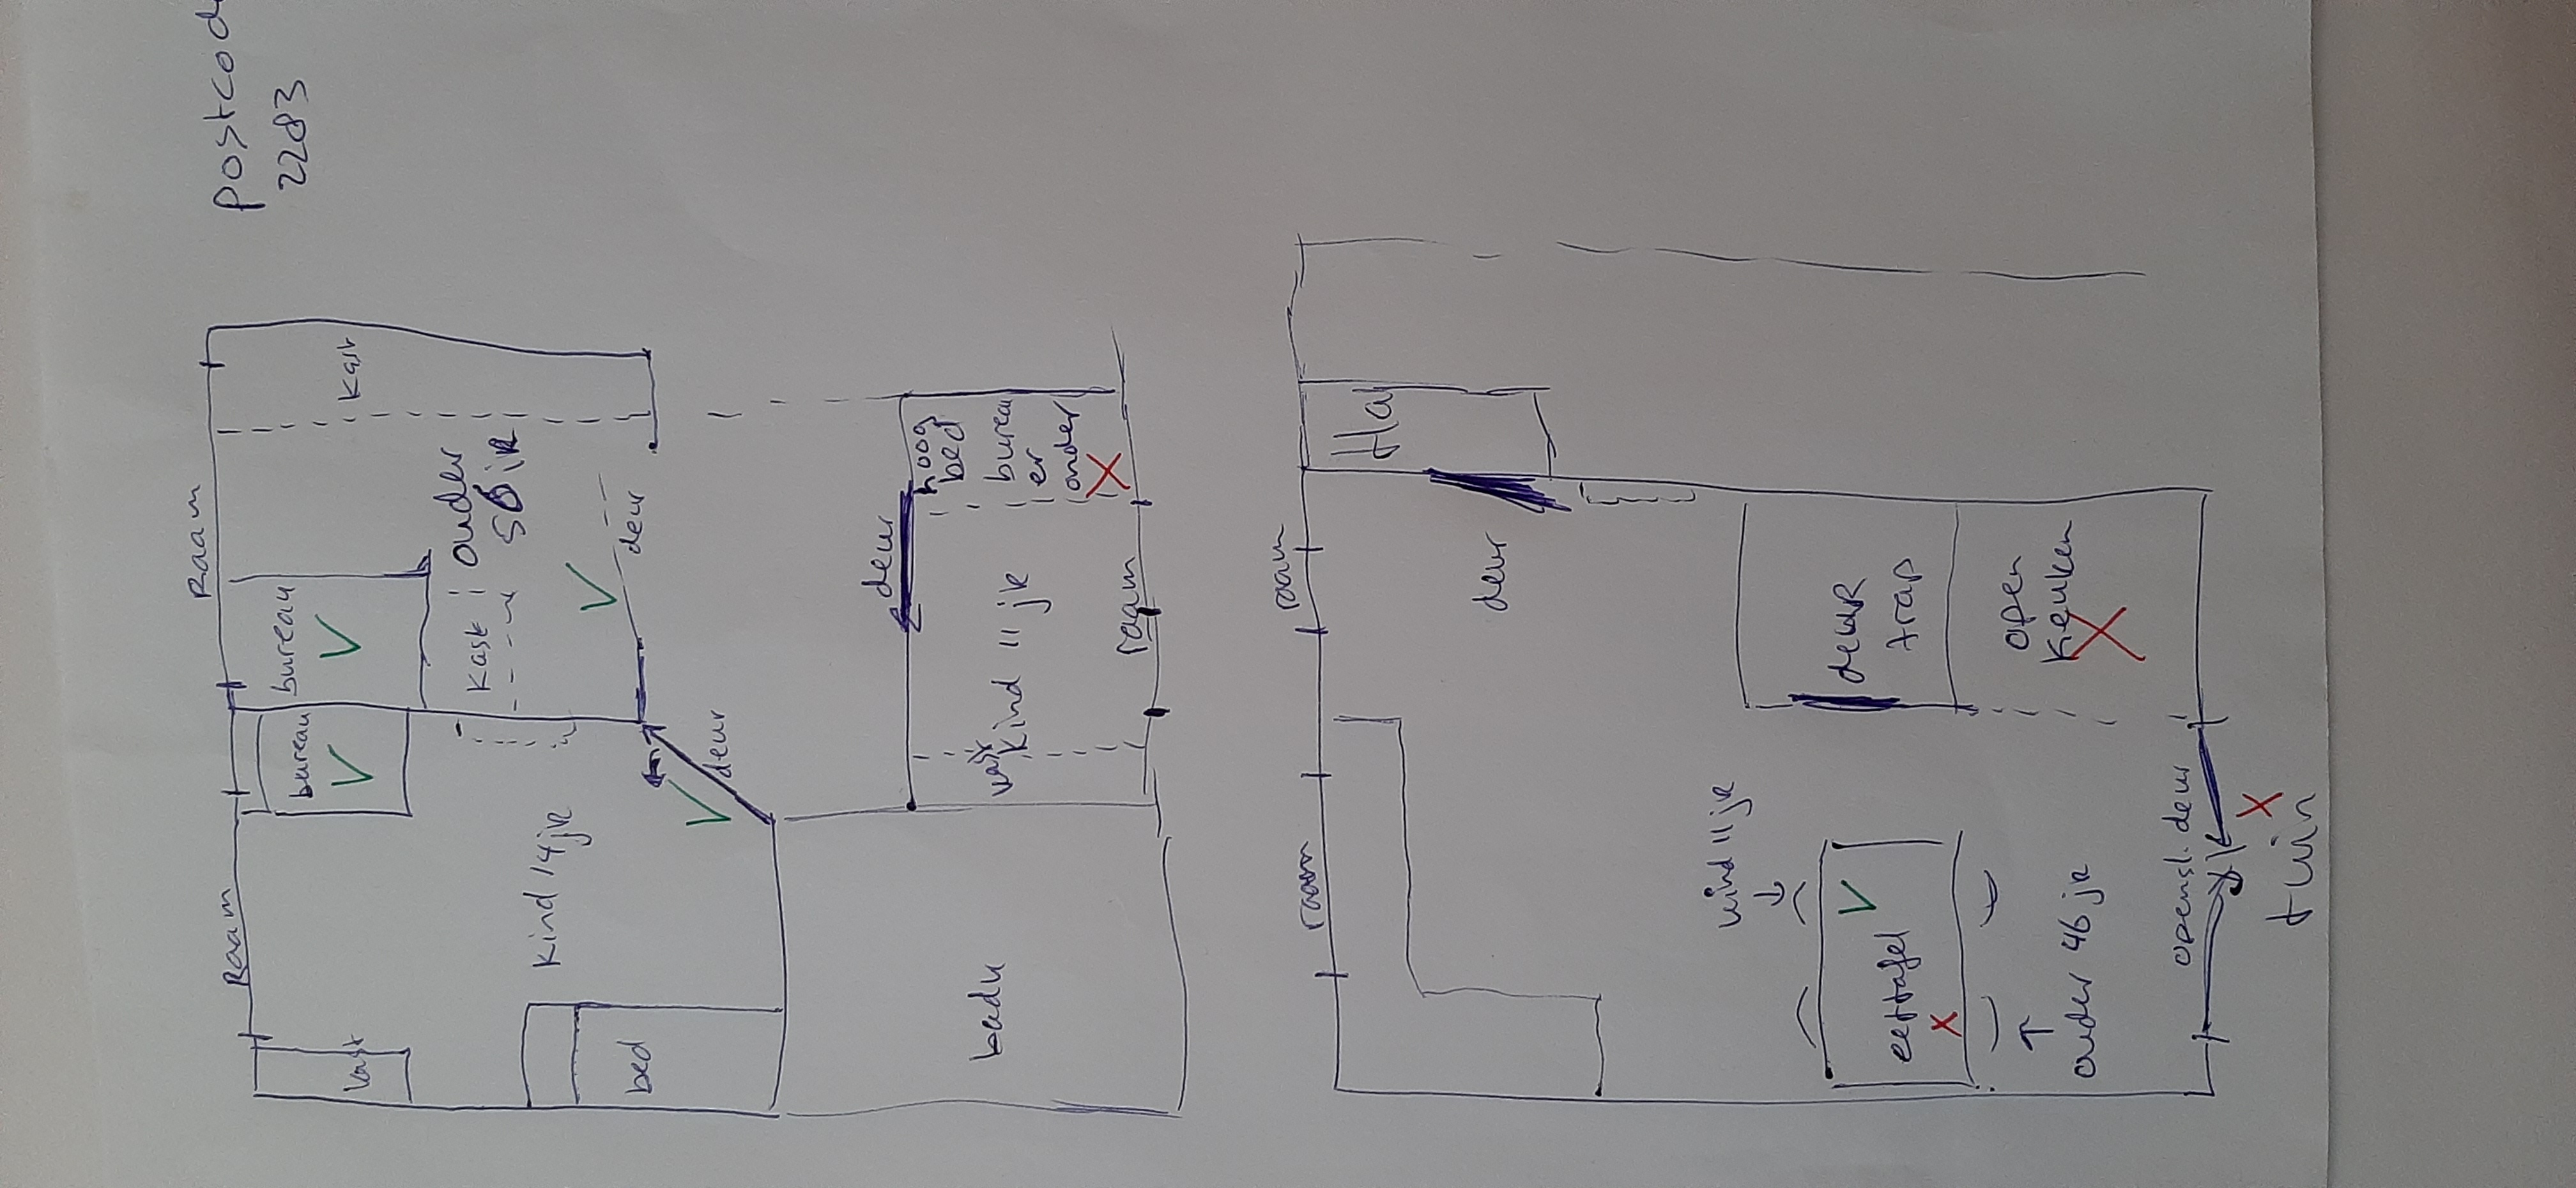

In [33]:
Image(filename='data/images/20230116_140414.jpg', width=500, height=50) 

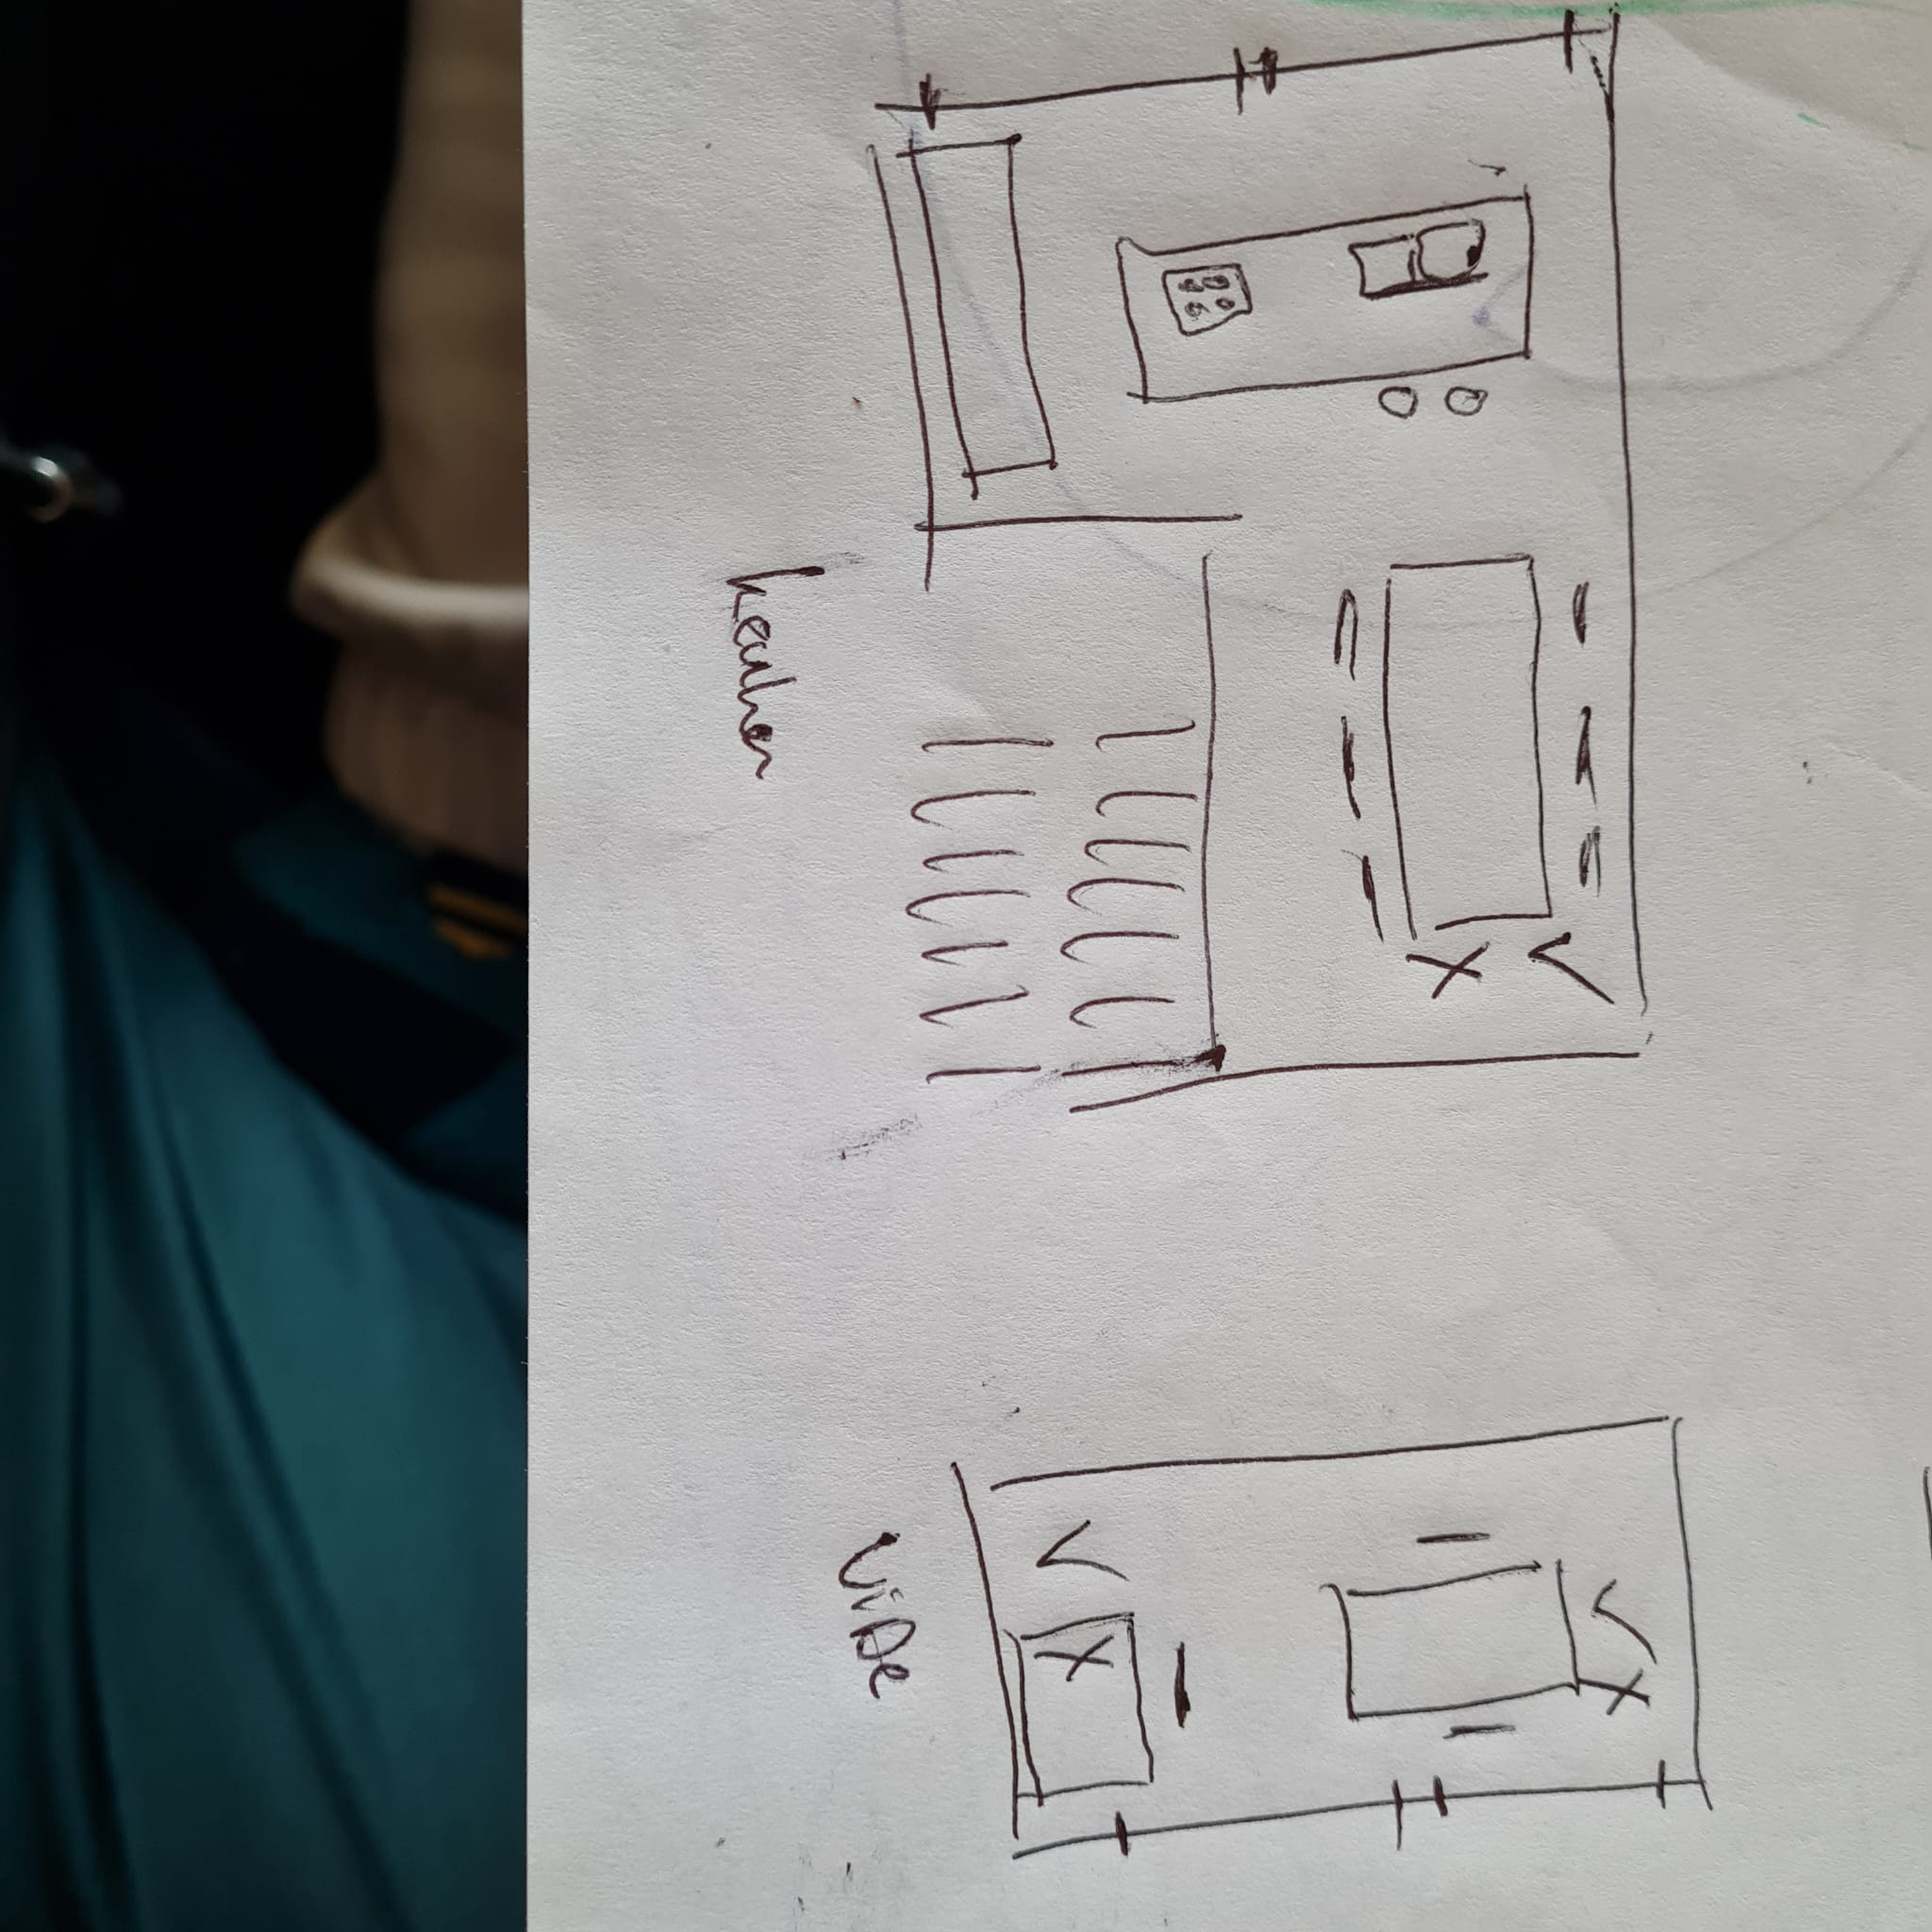

In [34]:
Image(filename='data/images/WhatsApp_Image_2023_01_19_at_13.39.07.jpeg', width=500, height=50) 

In [35]:
print(data['image-description'][1])

Een dichte deur is fijn, minder geluid maar ook lastig, is je kind wel bezig? Open keuken leidt snel af. Bureau onder hoogslaper was te klein en er stond speelgoed. Werken in huiskamer met 2 kinderen kon ouder (56) niet ivm online vergaderingen, dus eigen werkplek. 2 kinderen in huiskamer kon niet ivm online lessen. Dus 1 kind in eigen kamer, 1 ouder in werkkamer, 1 ouder in de ochtend beneden met kind van 11 - die had meeste begeleiding nodig. Die ouder werkte in de middag en avond


A closed door is nice, less sound but also difficult, is your child busy? Open kitchen distracts quickly. Bureau under loft bed was too small and there was toys. Working in living room with 2 children could not be older (56) because of online meetings, so own workplace. 2 children in the living room could not have online lessons. So 1 child in his own room, 1 parent in the office, 1 parent in the morning with child of 11 - he needed most guidance. That parent worked in the afternoon and evening

In [36]:
print(data['image-description'][2])

Het is nog zozeer de plek als wat er afleidend is. Beiden raken van schermen erg afgeleid. Dus aan de ene kant hebben ze het wel nodig voor huiswerk en videobellen maar tegelijkertijd leidt het ook enorm af.


It is so much the place as what is distracting. Both are very derived from screens. So on the one hand they need it for homework and video calling, but at the same time it also distracts enormously.

In [37]:
data.head()

,area-type,house-type,house-size,postcode,household-size,image,image-description,frequency-usage-office,frequency-usage-living-dining,frequency-usage-bedrooms,frequency-usage-kitchen,frequency-usage-outdoors,frequency-usage-berging,living-dining-hot,living-dining-cold,living-dining-humid,living-dining-fresh,living-dining-noisy,living-dining-poorly-lit,living-dining-well-lit,living-dining-wifi,living-dining-often-used,office-hot,office-cold,office-humid,office-fresh,office-noisy,office-poorly-lit,office-well-lit,office-wifi,office-often-used,bedroom-hot,bedroom-cold,bedroom-humid,bedroom-fresh,bedroom-noisy,bedroom-poorly-lit,bedroom-well-lit,bedroom-wifi,bedroom-often-used,kitchen-hot,kitchen-cold,kitchen-humid,kitchen-fresh,kitchen-noisy,kitchen-poorly-lit,kitchen-well-lit,kitchen-wifi,kitchen-often-used,outdoor-hot,outdoor-cold,outdoor-humid,outdoor-fresh,outdoor-noisy,outdoor-poorly-lit,outdoor-well-lit,outdoor-wifi,outdoor-often-used,berging-hot,berging-cold,berging-humid,berging-fresh,berging-noisy,berging-poorly-lit,berging-well-lit,berging-wifi,berging-often-used,learning-disability,items-available,spent-time-improving-space,money-spent,pandemic-changes,improve-space-constrain,space-happy,no-days-home,alone(y/n),next-steps,ages,no-of-pandemic-changes
0,City,Apartment,50 - 75 m²,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,City,Terraced,75 - 100 m²,2283,4,20230116_140414.jpg,"Een dichte deur is fijn, minder geluid maar oo...",Rarely,Sometimes,Often,Never,Never,Never,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADD/ADHD,"Keyboard,Laptop,Mouse,Speakers,Headphones,Micr...",Somewhat agree,€100 - €500,"['Goede (bureau)stoelen', ' meer verwarmen', '...","Betere begeleiding, betere WiFi",2.0,0 days,Alone,Prize draw and future interview,"46,56,14,11",7.0
2,City,Terraced,more than 200 m²,1096,4,WhatsApp Image 2023-01-19 at 13.39.07.jpeg,Het is nog zozeer de plek als wat er afleidend...,Sometimes,Always,Never,Always,Never,Never,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,Yes,Yes,No,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,"Desktop computer,Keyboard,Laptop,Mouse,Tablet,...",Somewhat agree,€0 - €100,['Betere indeling meubelen/tafels'],nee,5.0,0 days,Alone,Prize draw and future interview,"48,44,9,5",1.0
3,City,Terraced,100 - 150 m²,6851,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"62,50,16",NaN
4,City,Terraced,75 - 100 m²,3604,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"44,44,11,6",NaN


# Usage of Spaces

In [39]:
data.groupby(['frequency-usage-office'])['frequency-usage-office'].count()
data.groupby(['frequency-usage-living-dining'])['frequency-usage-living-dining'].count()
data.groupby(['frequency-usage-bedrooms'])['frequency-usage-bedrooms'].count()
data.groupby(['frequency-usage-berging'])['frequency-usage-berging'].count()
data.groupby(['frequency-usage-outdoors'])['frequency-usage-outdoors'].count()
data.groupby(['frequency-usage-kitchen'])['frequency-usage-kitchen'].count()

frequency-usage-kitchen
Always       2
Never        3
Sometimes    1
Name: frequency-usage-kitchen, dtype: int64

In [40]:
df_usage_spaces = pd.DataFrame( {
    "space" : ["home-office", "living/dining", "bedroom", "kitchen", "outdoor" , "berging"] , 
    "Always" : [0, 2, 1, 2,0, 0],
    "Often" : [0, 2, 4, 2, 1, 2],
    "Sometimes" : [1, 2, 1, 2, 0, 0],
    "Rarely" : [1, 0, 0, 0, 1, 0],
    "Never" : [2, 0, 1, 3, 4, 2]} )

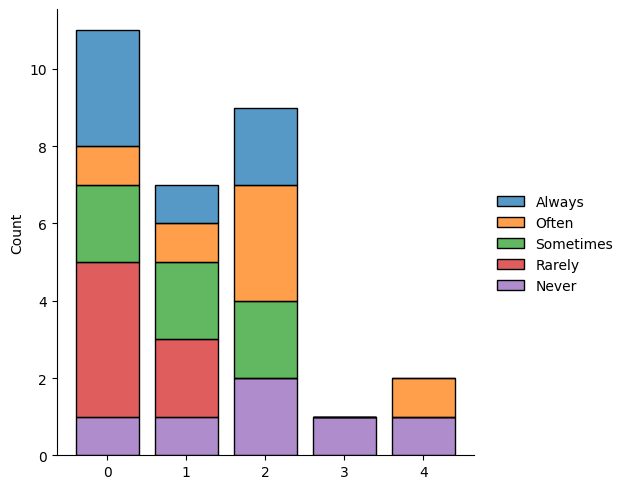

In [41]:
sns.displot(data=df_usage_spaces, discrete=True, multiple="stack", shrink=0.8)

# Quality of Spaces

In [42]:
def analyse_responses_rooms(room):
    '''
    Accepts the name of the room in the house.
    Filters the columns relevan to the ``room parameter. Then iterates through those
    columns and counts the yes/no responses. These responses are saved to a temp 
    ``df_room_plot df that is then plotted. 
    '''
    df_room=data.filter(like=room)
    
    data_list = []
    for column in df_room.iloc[:,1:]:
        x = df_room[column].value_counts()
        data_list.append(x)
    
    df_room_plot = pd.DataFrame(data_list)
    plot_responses_rooms(df_room_plot, room)

    
def plot_responses_rooms(df, room):
    labels = ['too-hot', 'too-cold', 'humid', 'fresh', 
             'noisy', 'poorly-lit', 'well-lit',
             'good-wifi', 'often-used']

    df.plot.bar()
    plt.ylim([0, 6])
    plt.ylabel("Count of responses")
    plt.xticks(np.arange(len(labels)),labels)
    # plt.xlabel(room)
    plt.title(room.capitalize())
    plt.savefig('plots/space-usage/' + room + '_count_reponses.jpg',
                dpi=300,
                bbox_inches='tight')

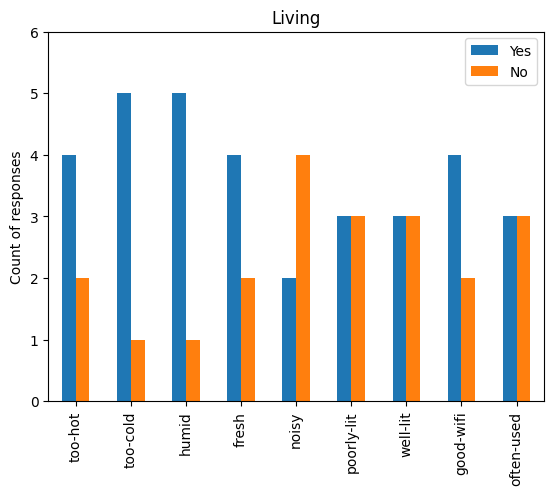

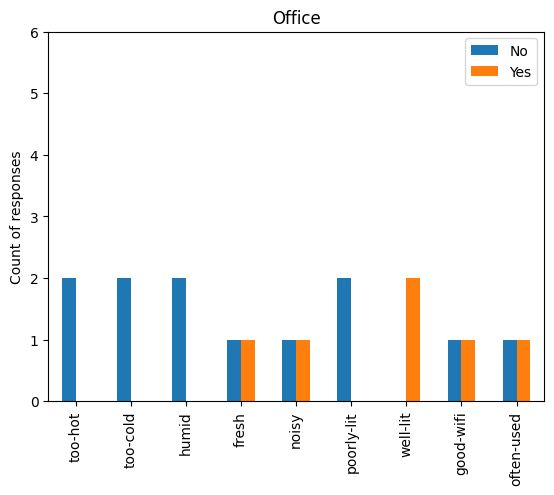

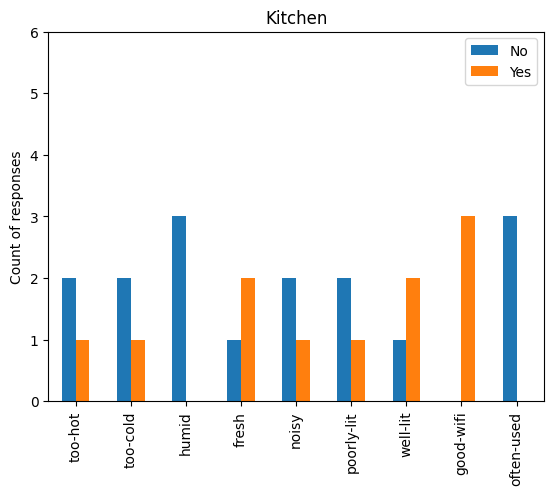

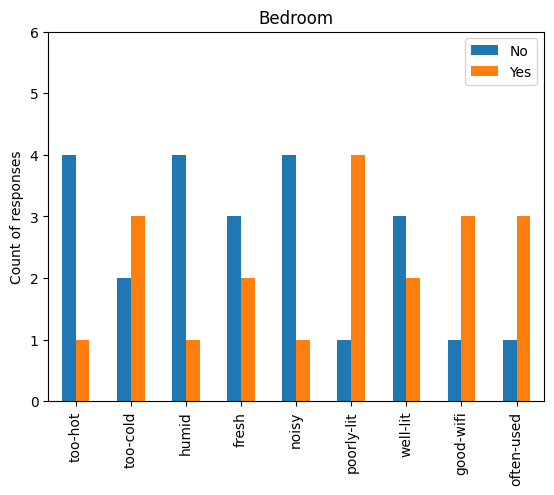

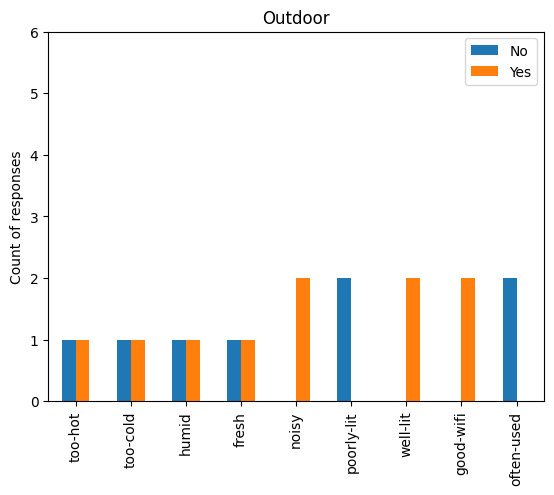

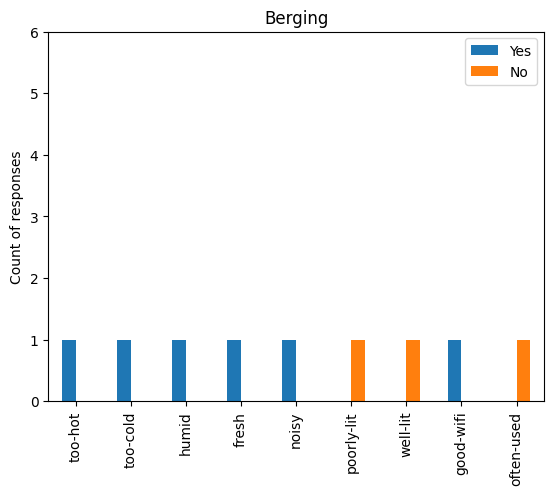

In [43]:
rooms = ['living',
        'office',
        'kitchen',
        'bedroom',
        'outdoor',
        'berging']

for room in rooms:
    analyse_responses_rooms(room)

# Learning Disability

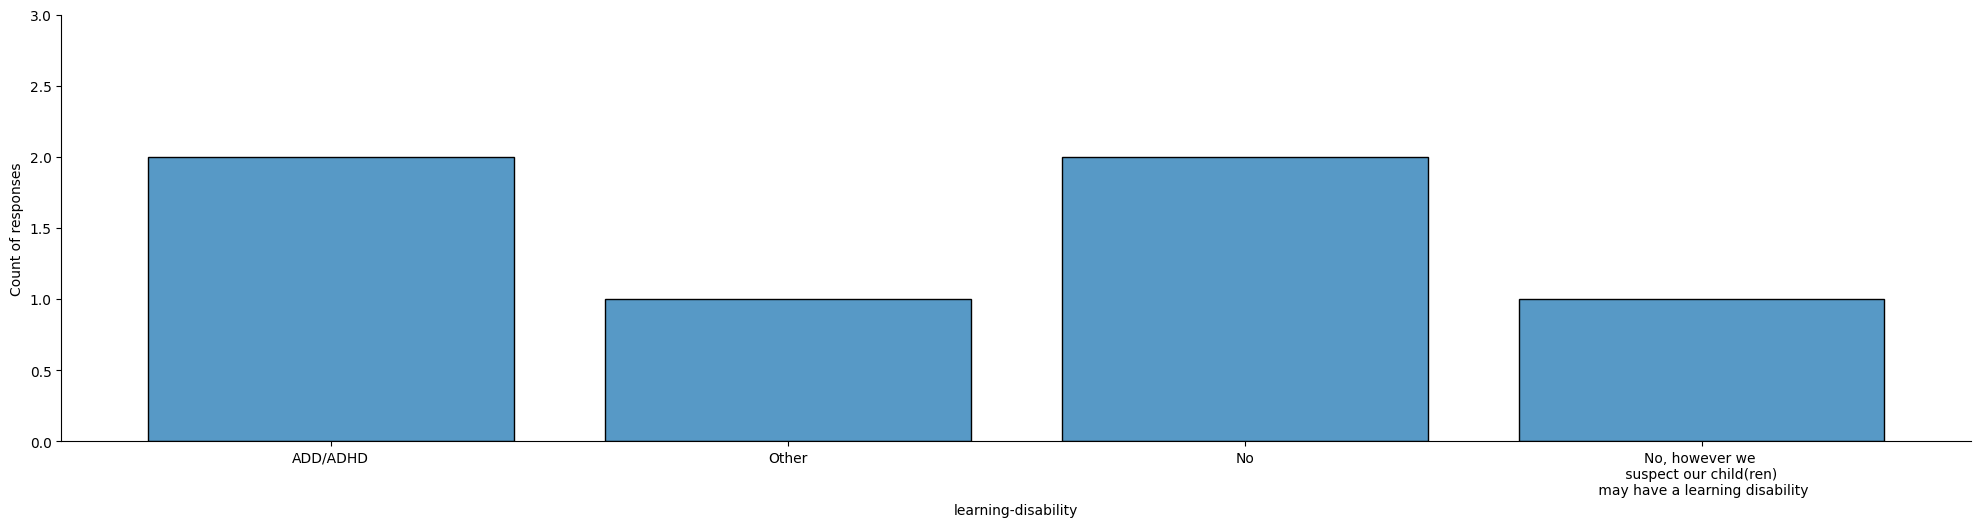

In [44]:
sns.displot(data, x='learning-disability', discrete=True, shrink=0.8, aspect =4)
label = 'No, however we \n suspect our child(ren) \n may have a learning disability'
ticks,labels  = plt.xticks()
labels[3] = label
plt.xticks(ticks, labels)
plt.ylim([0, 3])
plt.ylabel("Count of responses")
plt.savefig('plots/learning_disability.jpg',
            dpi=300,
            bbox_inches='tight')

# Items Availabile

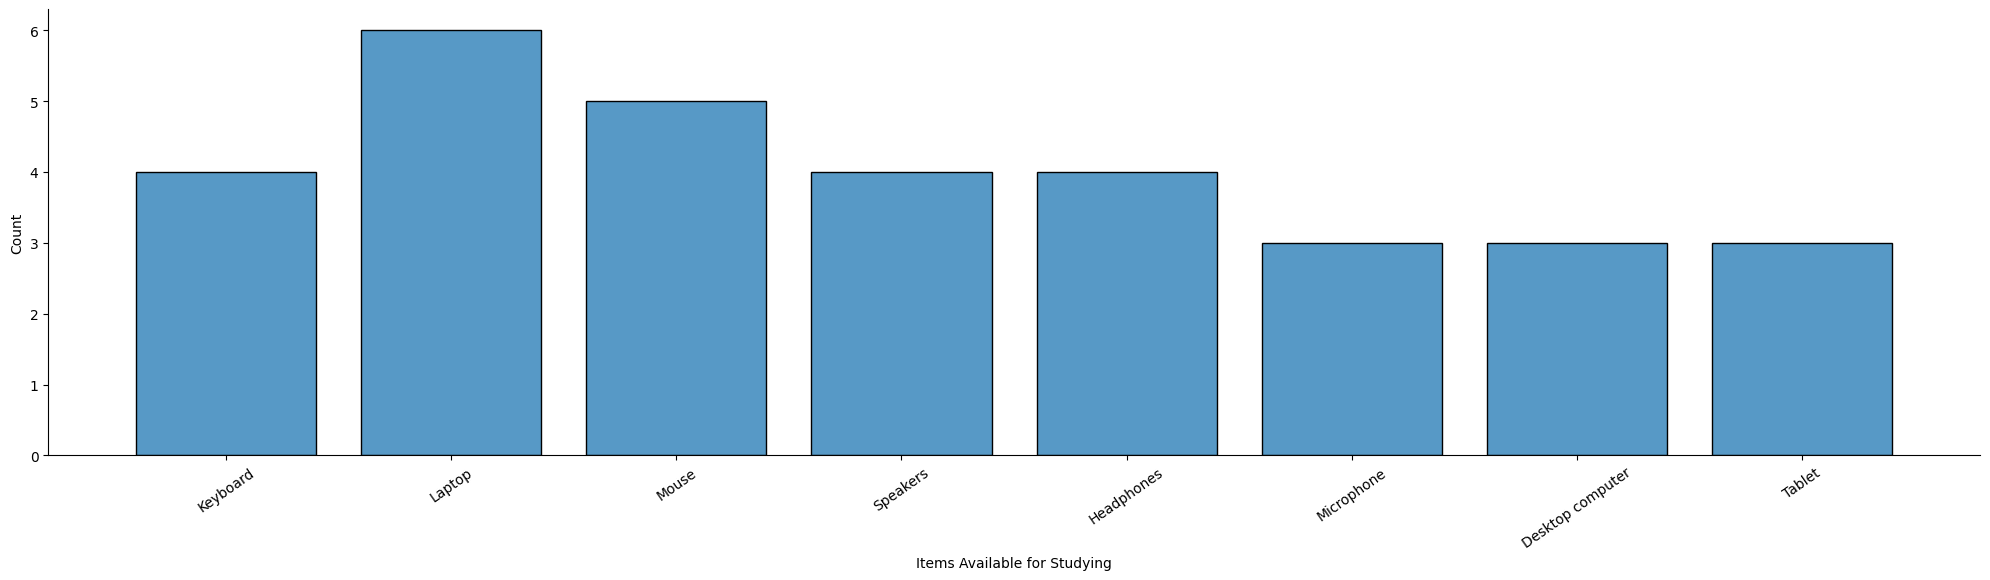

In [45]:
def flatten(arg):
    '''
    Given a list of lists, returns a flattened list
    '''
    if not isinstance(arg, list):
        return [arg]
    return [x for sub in arg for x in flatten(sub)]


def items_available():
    '''
    Identifies the list of available items for studying
    '''
    lst = []
    list_of_items = [x for x in data['items-available'] if str(x) != 'nan']
    
    for x in list_of_items:
        lst.append(x.split(','))
        list_of_items = flatten(lst)
    
    return list_of_items
    
    
def plot_items_available(arg):
    '''
    Plots the count plot of available items at home for stuyding
    '''
    sns.displot(arg, discrete=True, shrink=.8, aspect=4)
    plt.xlabel("Items Available for Studying")
    plt.xticks(rotation=35)
    plt.savefig('plots/reflection/items-available.jpg', dpi=300, bbox_inches='tight')
    
plot_items_available(items_available())

# Reflection

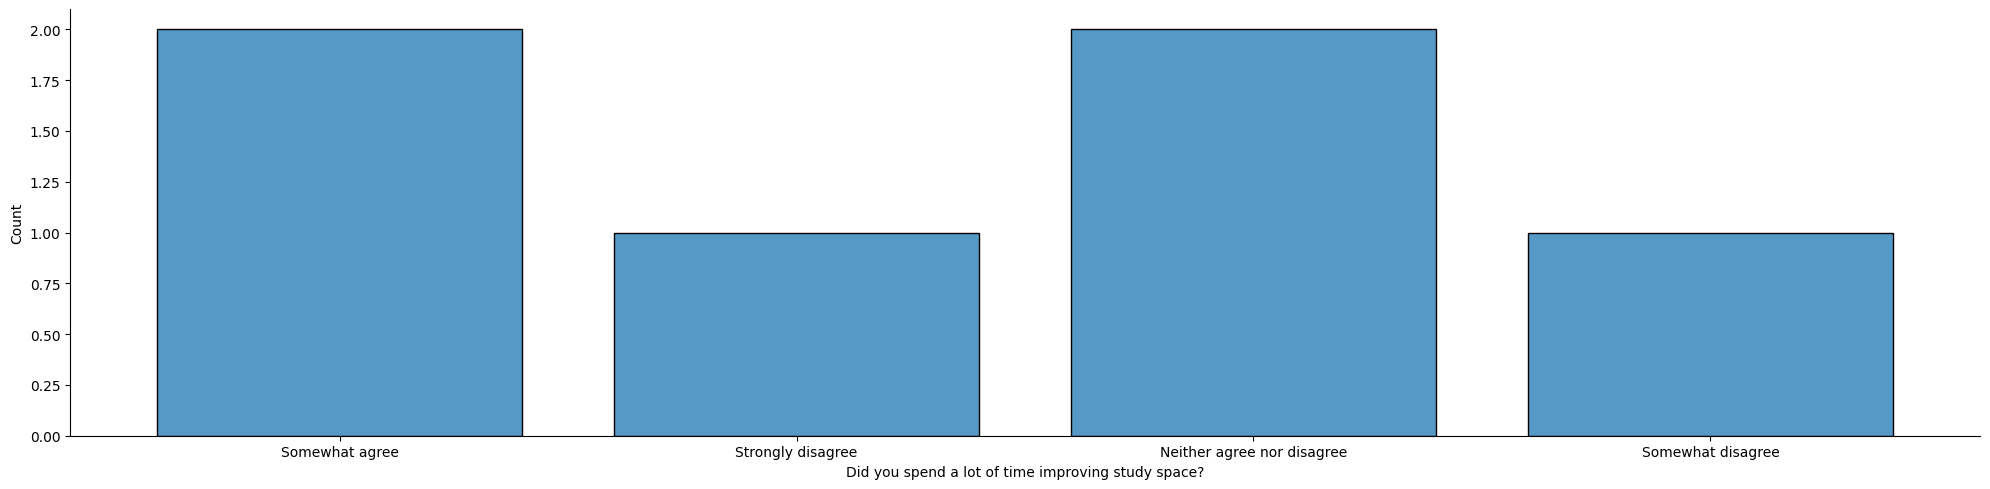

In [46]:
sns.displot(data, x='spent-time-improving-space', discrete=True, shrink=0.8, aspect =4)
plt.xlabel("Did you spend a lot of time improving study space?")
plt.savefig('plots/reflection/time-spent-improving-space.jpg', dpi=300, bbox_inches='tight')

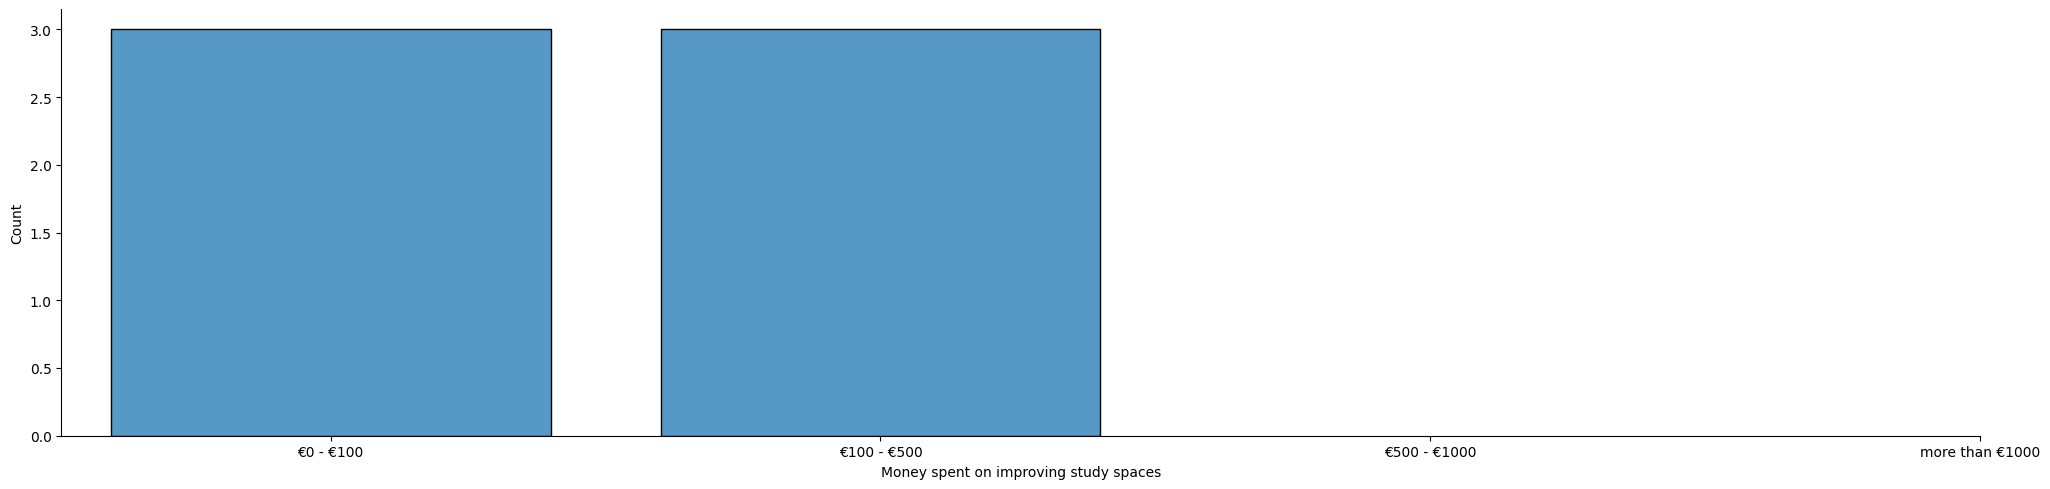

In [47]:
labels = ['€0 - €100','€100 - €500','€500 - €1000','more than €1000']

sns.displot(data, x='money-spent', discrete=True, shrink=0.8, aspect =4)
plt.xlabel("Money spent on improving study spaces")
plt.xticks(np.arange(len(labels)),labels)
plt.savefig('plots/reflection/money-spent-improving-space.jpg', dpi=300, bbox_inches='tight')

In [48]:
def wordcloud_generator(text, theme):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('plots/reflection/' + theme + '.jpg', dpi=300, bbox_inches='tight')

### Pandemic Changes

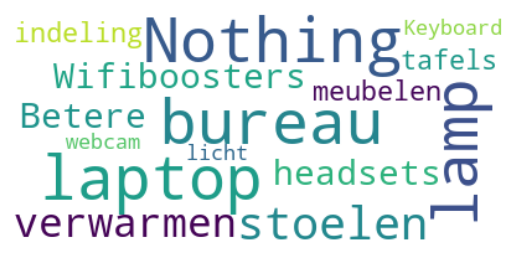

In [49]:
text = " ".join(review for review in data['pandemic-changes'].dropna())
text = '(bureau)stoelen, verwarmen, lamp, bureau, Wifiboosters, laptop, headsets, Betere indeling, meubelen/tafels, Nothing, Nothing, Keyboard, laptop, webcam, licht, lamp'
    
wordcloud_generator(text, 'pandemic-changes')

### Desired Improvements

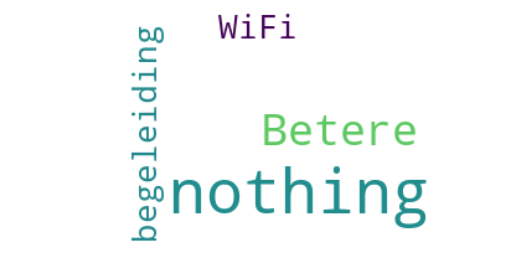

In [50]:
text = " ".join(comment for comment in data['improve-space-constrain'].dropna())
text = 'Betere begeleiding, betere WiFi, nothing, nothing, nothing,  nothing, nothing'
wordcloud_generator(text, 'improvements')

### Space Satisfaction

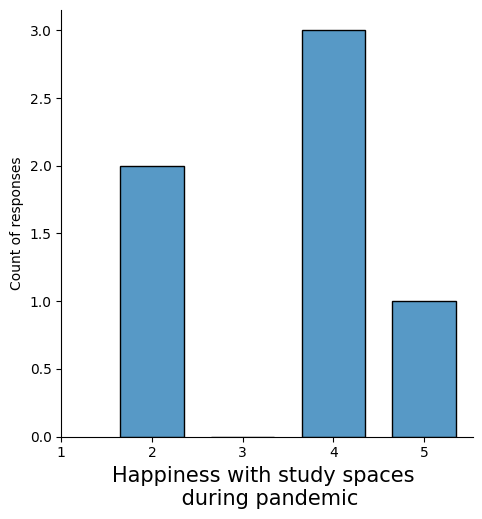

In [51]:
labels = [1,2,3,4,5]
sns.displot(data['space-happy'], discrete=True, shrink=.7,)
plt.ylabel("Count of responses")
plt.xticks([1,2,3,4,5],labels)
plt.xlabel("Happiness with study spaces \n during pandemic", size=15)
plt.savefig('plots/reflection/space-happy.jpg', dpi=300, bbox_inches='tight')

### Future Days Students Can Study From Home

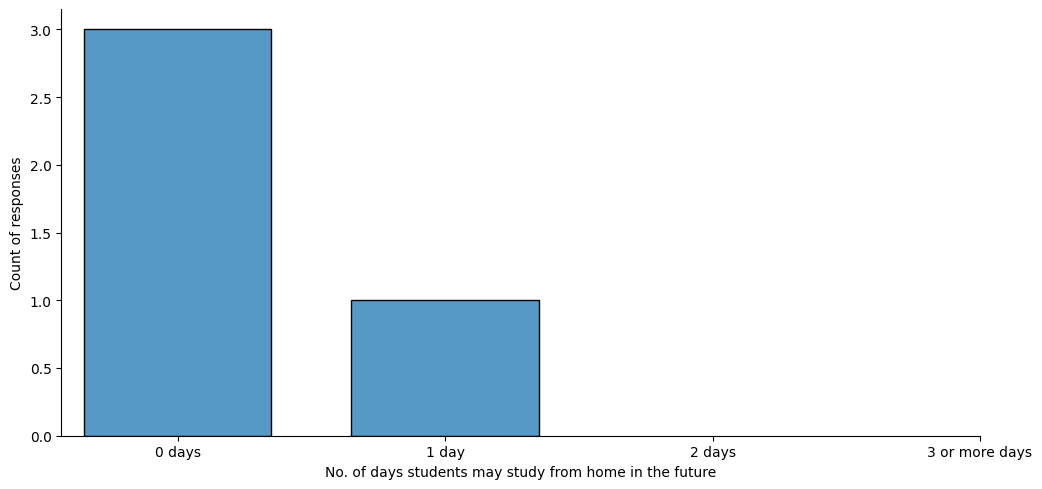

In [52]:
labels = ["0 days","1 day","2 days","3 or more days"]

sns.displot(data['no-days-home'], discrete=True, shrink=.7,aspect=2)
plt.ylabel("Count of responses")
plt.xticks(np.arange(len(labels)),labels)
plt.xlabel("No. of days students may study from home in the future")
plt.savefig('plots/reflection/days-from-home.jpg', dpi=300, bbox_inches='tight')

# Conclusion

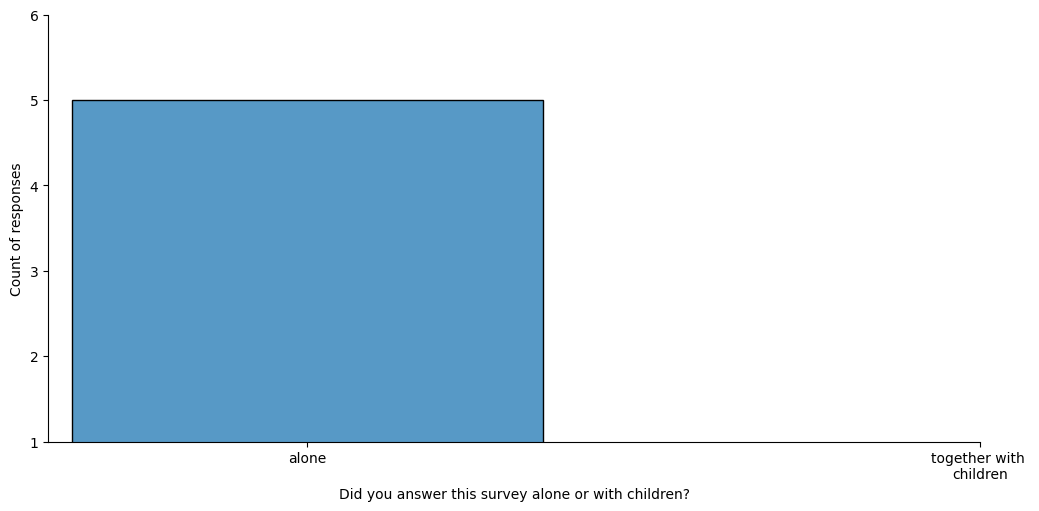

In [53]:
labels = ['alone', 'together with \nchildren']
sns.displot(data['alone(y/n)'], discrete=True, shrink=.7,aspect=2)
plt.ylabel("Count of responses")
plt.ylim([1,6])
plt.xticks(np.arange(len(labels)),labels)
plt.xlabel("Did you answer this survey alone or with children?")
plt.savefig('plots/conclusion/alone-together.jpg', dpi=300, bbox_inches='tight')

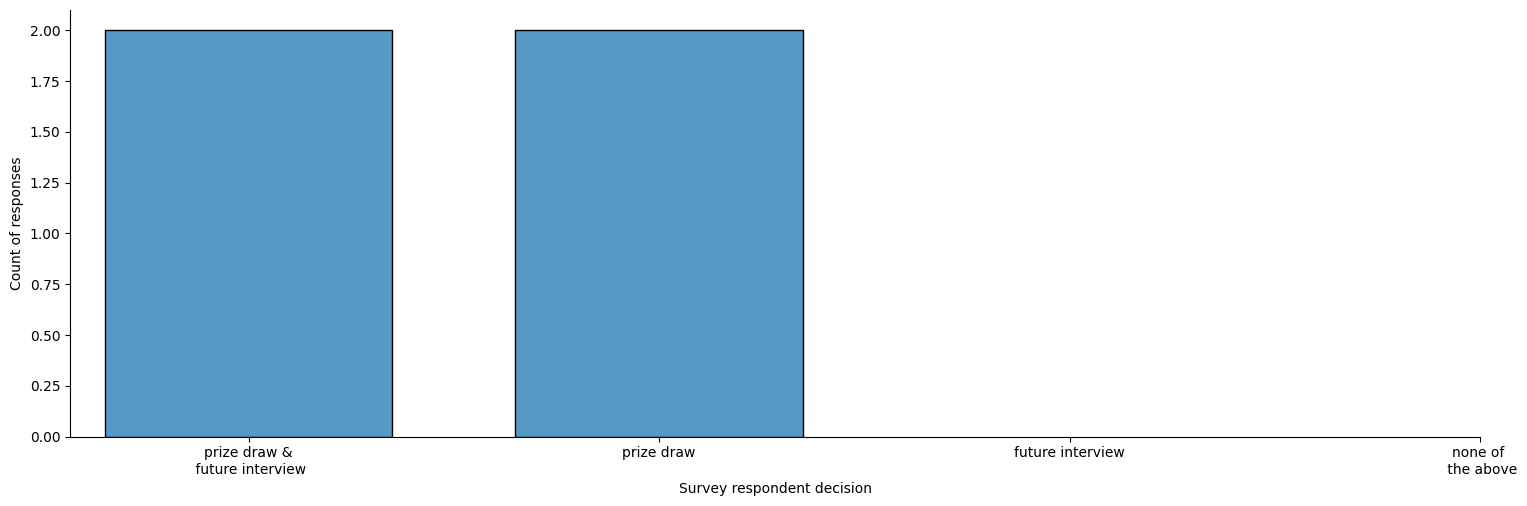

In [54]:
labels = ['prize draw &\n future interview', 'prize draw', 'future interview', 'none of \n the above']
sns.displot(data['next-steps'], discrete=True, shrink=.7,aspect=3)
plt.ylabel("Count of responses")
# plt.ylim([1,3])
plt.xticks(np.arange(len(labels)),labels)
plt.xlabel("Survey respondent decision")
plt.savefig('plots/conclusion/next-steps.jpg', dpi=300, bbox_inches='tight')

# Mixed Analysis

### Satisfaction vs Money Spent

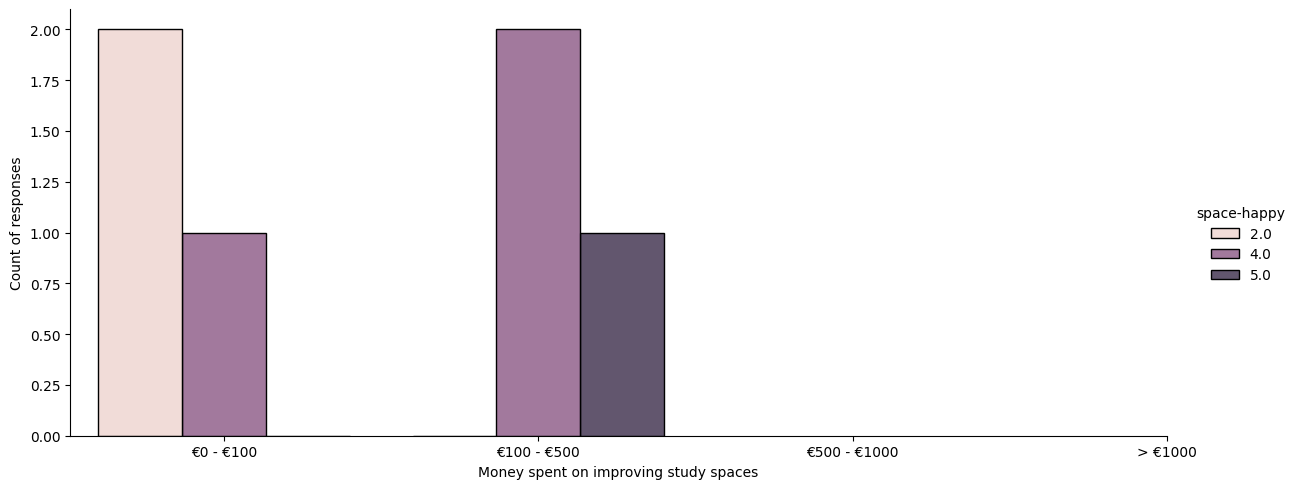

In [84]:
labels = ['€0 - €100','€100 - €500','€500 - €1000','> €1000']

sns.displot(data[['money-spent', 'space-happy', 'area-type']],
            hue="space-happy",
            x="money-spent",
            multiple="dodge",
            discrete=True,
            shrink=0.8,
            aspect=2.4)

plt.xlabel("Money spent on improving study spaces")
plt.ylabel("Count of responses")
plt.xticks(np.arange(len(labels)),labels)
plt.savefig('plots/mixed-analysis/money-spent-happiness.jpg', dpi=300, bbox_inches='tight')

### Disability vs Changes Made

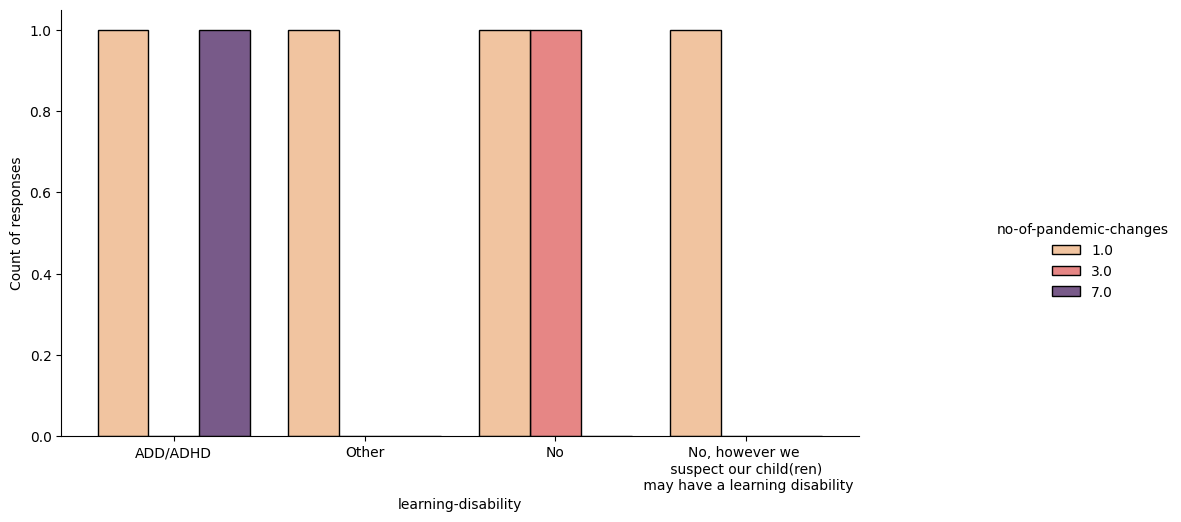

In [82]:
label = 'No, however we \n suspect our child(ren) \n may have a learning disability'

sns.displot(data,
            hue="no-of-pandemic-changes",
            x="learning-disability",
            multiple="dodge",
            discrete=True,
            shrink=0.8,
            aspect=2, palette="flare"
           )

ticks,labels  = plt.xticks()
labels[3] = label
plt.xticks(ticks, labels)
# plt.ylim([0, 1])
plt.ylabel("Count of responses")
plt.savefig('plots/mixed-analysis/changes_learning_disability.jpg',
            dpi=300,
            bbox_inches='tight')



### Postcode Analysis

In [97]:
data.postcode.apply(pd.to_numeric, errors='coerce').dropna().to_csv('data/postcodes.csv')

# Environmental Analysis

In [229]:
def analyse_environment_rooms(env):
    '''
    Accepts the environment variable.
    Filters the columns relevan to the ``room parameter. Then iterates through those
    columns and counts the yes/no responses. These responses are saved to a temp 
    ``df_room_plot df that is then plotted. 
    '''
    df_env = data.filter(like=env)
    
    data_list = []
    for column in df_env:
        x = df_env[column].value_counts()
        data_list.append(x)
    
    df_env_plot = pd.DataFrame(data_list)
    plot_environment_rooms(df_env_plot, env)

    
def plot_environment_rooms(df, env):
    labels = ['living-dining', 'office', 'bedroom', 'kitchen', 
             'outdoor', 'berging']
    ax = plt.subplot(3, 3, n + 1)
    df.plot.bar(ax=ax)
    plt.ylim([0, 6])
    # plt.ylabel("Count of responses")
    plt.xticks(np.arange(len(labels)),labels)
    plt.title(env.capitalize())

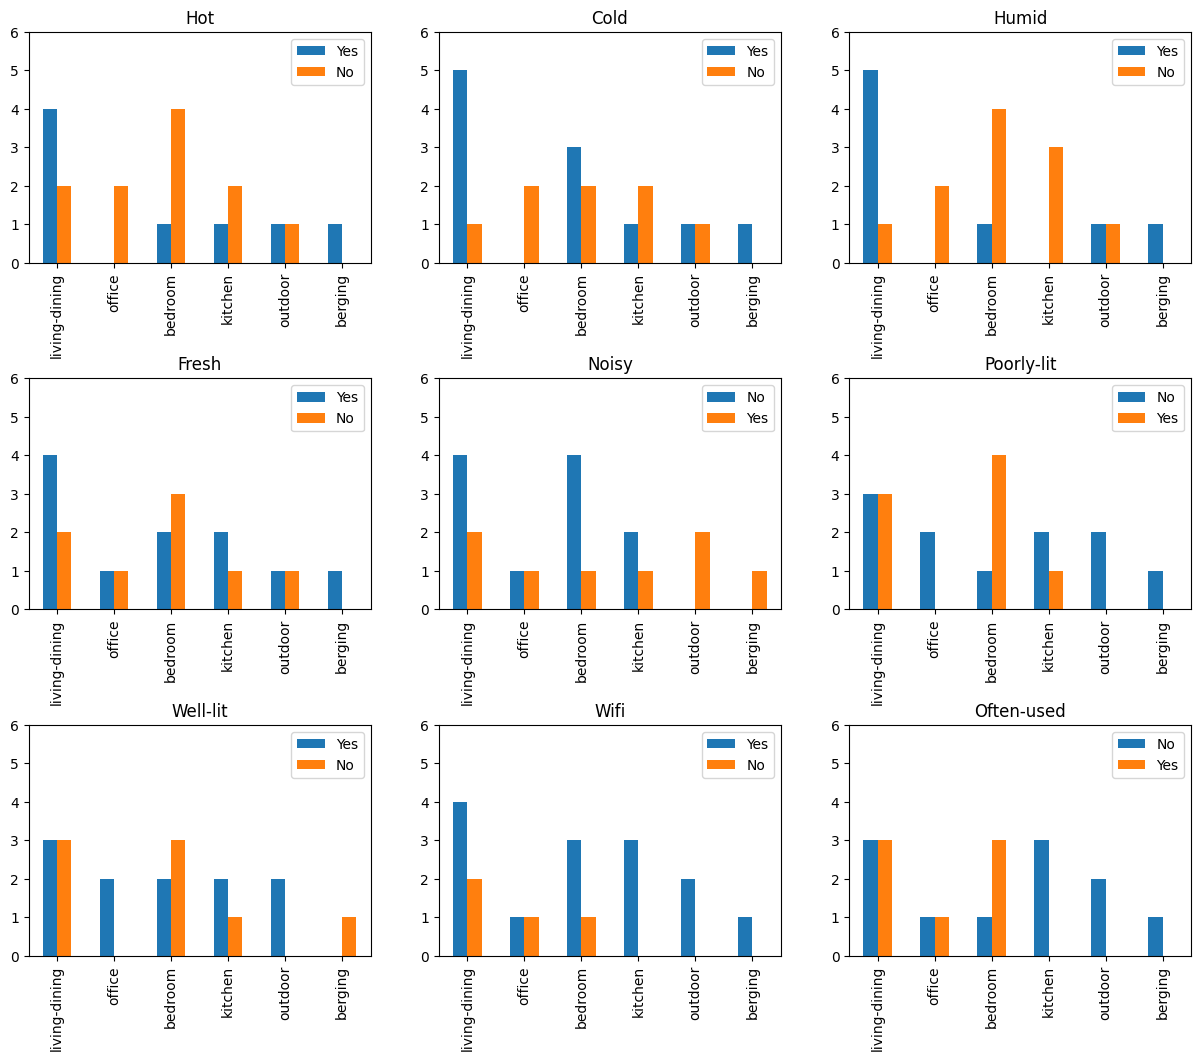

In [231]:
env_vars = ['hot', 'cold',
           'humid', 'fresh',
           'noisy', 'poorly-lit',
           'well-lit', 'wifi',
           'often-used']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for n, env_var in enumerate(env_vars):
    analyse_environment_rooms(env_var)

plt.savefig('plots/environment/env_count_reponses.jpg',
            dpi=300, bbox_inches='tight')